In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib as plt
import numpy as np

TEST_SIZE = 0.2

In [2]:
df = pd.read_csv('emnist-letters.csv')
# Viene diviso il dataset in train e test set
train_df, test_df = train_test_split(df, test_size = TEST_SIZE, random_state = 42)
# Viene diviso il train set in train e validation set
train_df, val_df = train_test_split(train_df, test_size = TEST_SIZE, random_state = 42)

train_x = train_df.iloc[:,1:].to_numpy().reshape(-1, 28, 28, 1)/255
train_y = train_df.iloc[:,0].to_numpy()-1

val_x = val_df.iloc[:,1:].to_numpy().reshape(-1, 28, 28, 1)/255
val_y = val_df.iloc[:,0].to_numpy()-1

test_x = test_df.iloc[:,1:].to_numpy().reshape(-1, 28, 28, 1)/255
test_y = test_df.iloc[:,0].to_numpy()-1

c:\Users\savel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 17s 145ms/step - accuracy: 0.4757 - loss: 4.0536 - val_accuracy: 0.7599 - val_loss: 1.4632
Epoch 2/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 23s 207ms/step - accuracy: 0.7824 - loss: 1.2853 - val_accuracy: 0.8264 - val_loss: 0.9359
Epoch 3/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.8391 - loss: 0.8834 - val_accuracy: 0.8583 - val_loss: 0.7531
Epoch 4/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 24s 215ms/step - accuracy: 0.8616 - loss: 0.7375 - val_accuracy: 0.8763 - val_loss: 0.6615
Epoch 5/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.8782 - loss: 0.6431 - val_accuracy: 0.8876 - val_loss: 0.5911
Epoch 6/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 23s 203ms/step - accuracy: 0.8808 - loss: 0.5998 - val_accuracy: 0.8941 - val_loss: 0.5466
Epoch 7/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.8920 - loss: 0.5546 - val_accuracy: 0.8959 - val_loss: 0.5173
Epoch 8/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 24s 214ms/step - accuracy: 

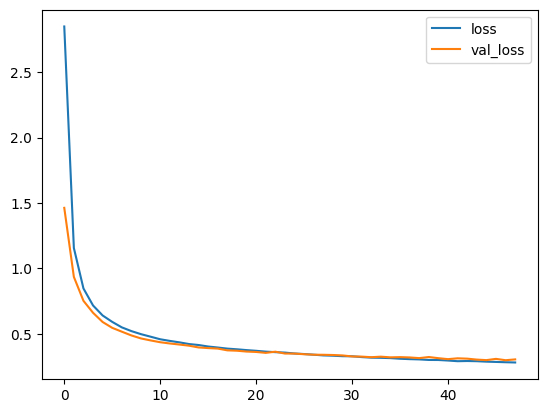

In [13]:
# Puoi aggiungere un layer di dropuot  layers.Dropout(0.3)
model = keras.models.Sequential([keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='tanh', input_shape=(28, 28, 1), kernel_initializer="glorot_normal"),
                                 keras.layers.Dropout(rate=0.3),
                                 keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
                                 keras.layers.Conv2D(filters=48, kernel_size=(5,5), activation='tanh'),
                                 keras.layers.Dropout(rate=0.4),
                                 keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
                                 keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='tanh'),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(120, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.01)),
                                 keras.layers.Dense(84, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.01)),
                                 keras.layers.Dense(26, activation='softmax')
                                 ])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, min_delta=0.001, restore_best_weights=True)

history = model.fit(train_x, train_y,
                    epochs=1000,
                    batch_size=512,
                    callbacks=[early_stopping_cb],
                    validation_data=(val_x, val_y))

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

print("Number of epochs: {}".format(history_df['val_loss'].idxmin()))
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))